<a href="https://colab.research.google.com/github/Abdullah9974/CSE299_grp3/blob/master/RICE_LEAF_DISEASE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Apr 17 16:18:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu


     |████████████████████████████████| 394.3MB 41kB/s 


In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
#importing the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# resizing all the images resolution

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/riceleaf_disease_2/train'
test_path = '/content/drive/MyDrive/riceleaf_disease_2/test'

In [ ]:
#import Inception V3 library and add preproccessing layer to the front VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
#Not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
#useful for getting number of output classess
folders = glob('/content/drive/MyDrive/riceleaf_disease_2/train/*')

In [ ]:
folders

['/content/drive/MyDrive/riceleaf_disease_2/train/LeafBlast',
 '/content/drive/MyDrive/riceleaf_disease_2/train/BrownSpot',
 '/content/drive/MyDrive/riceleaf_disease_2/train/Healthy',
 '/content/drive/MyDrive/riceleaf_disease_2/train/Hispa']

In [ ]:
# our layers
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create amodel object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
#Use the Image data Generator to import the images from dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Reading from training dataset

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/riceleaf_disease_2/train',
                                                 target_size =(224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1600 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/riceleaf_disease_2/test',
                                                 target_size =(224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 492 images belonging to 4 classes.


In [ ]:
# TRAINING
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 1744s 17s/step - loss: 9.4192 - accuracy: 0.3336 - val_loss: 6.7501 - val_accuracy: 0.3984
Epoch 2/10
100/100 [==============================] - 239s 2s/step - loss: 5.0149 - accuracy: 0.4717 - val_loss: 9.0729 - val_accuracy: 0.4350
Epoch 3/10
100/100 [==============================] - 230s 2s/step - loss: 4.1327 - accuracy: 0.5729 - val_loss: 5.4196 - val_accuracy: 0.5203
Epoch 4/10
100/100 [==============================] - 225s 2s/step - loss: 4.3098 - accuracy: 0.6012 - val_loss: 9.4894 - val_accuracy: 0.4654
Epoch 5/10
100/100 [==============================] - 224s 2s/step - loss: 4.4384 - accuracy: 0.5941 - val_loss: 5.9410 - val_accuracy: 0.4634
Epoch 6/10
100/100 [==============================] - 222s 2s/step - loss: 3.6602 - accuracy: 0.6440 - val_loss: 5.6856 - val_accuracy: 0.5244
Epoch 7/10
100/100 [==============================] - 219s 2s/step - loss: 3.7332 - accuracy: 0.6329 - val_loss: 6.2141 - val_accuracy: 0.53

In [ ]:
# TRAINING
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 222s 2s/step - loss: 4.2019 - accuracy: 0.6569 - val_loss: 8.5594 - val_accuracy: 0.5020
Epoch 2/10
100/100 [==============================] - 223s 2s/step - loss: 4.7191 - accuracy: 0.6569 - val_loss: 11.7181 - val_accuracy: 0.4533
Epoch 3/10
100/100 [==============================] - 219s 2s/step - loss: 3.6293 - accuracy: 0.7013 - val_loss: 8.0758 - val_accuracy: 0.4837
Epoch 4/10
100/100 [==============================] - 218s 2s/step - loss: 3.1761 - accuracy: 0.7113 - val_loss: 7.2139 - val_accuracy: 0.4939
Epoch 5/10
100/100 [==============================] - 217s 2s/step - loss: 3.5572 - accuracy: 0.6925 - val_loss: 7.3139 - val_accuracy: 0.4959
Epoch 6/10
100/100 [==============================] - 220s 2s/step - loss: 2.8584 - accuracy: 0.7175 - val_loss: 7.1357 - val_accuracy: 0.5407
Epoch 7/10
100/100 [==============================] - 219s 2s/step - loss: 3.2553 - accuracy: 0.7175 - val_loss: 6.7578 - val_accuracy: 0.561

In [ ]:
import matplotlib.pyplot as plt

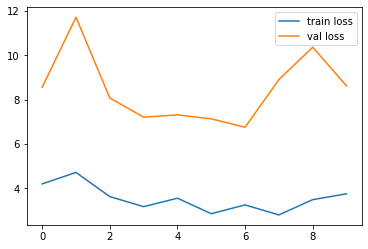

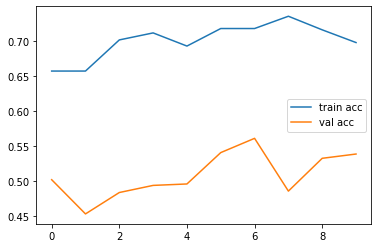

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

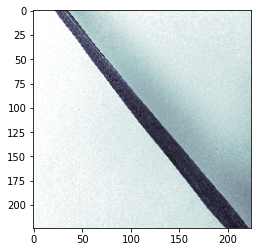

In [ ]:

testX, testY = test_set.next()
plt.imshow(testX[0][:,:,0], cmap='bone')


In [28]:

# saving as a h5 file
from tensorflow.keras.models import load_model


In [36]:
y_pred = model.predict(test_set)

In [37]:
y_pred

array([[7.7983418e-15, 9.9998271e-01, 1.7289383e-05, 4.5247532e-08],
       [1.4677993e-05, 9.9998534e-01, 1.4264118e-08, 1.1999756e-15],
       [1.5445904e-12, 1.0000000e+00, 2.1742828e-08, 2.3991619e-20],
       ...,
       [1.0000000e+00, 1.1771407e-10, 2.5644930e-08, 1.8460214e-16],
       [1.1190771e-20, 1.0000000e+00, 9.0253648e-15, 2.1914473e-13],
       [1.0857352e-21, 2.5973975e-04, 9.9861658e-01, 1.1236707e-03]],
      dtype=float32)

In [38]:
model.save('leaf_diseaserice.h5')